In [223]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
!pip install lucifer-ml

In [225]:
from luciferml.preprocessing import Preprocess as prep

In [226]:
!wget http://www.keshavmaheshwari.us/images/water_potability.csv

--2021-07-03 01:57:04--  http://www.keshavmaheshwari.us/images/water_potability.csv
Resolving www.keshavmaheshwari.us (www.keshavmaheshwari.us)... 18.205.222.128, 54.237.133.81, 52.202.168.65, ...
Connecting to www.keshavmaheshwari.us (www.keshavmaheshwari.us)|18.205.222.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525187 (513K) [text/csv]
Saving to: ‘water_potability.csv.11’

water_potability.cs 100%[===================>] 512.88K   363KB/s    in 1.4s    

2021-07-03 01:57:06 (363 KB/s) - ‘water_potability.csv.11’ saved [525187/525187]



In [227]:
water_data = pd.read_csv('water_potability.csv')
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [228]:
def impute_missing_data(data):
  # split into 1/0
  data_pos = data[data['Potability'] == 1]
  data_neg = data[data['Potability'] == 0]

  # col:
  col = list(data.columns)

  # fill missing data
  for i in range(len(data.columns)-1):
    data_pos[col[i]] = data_pos[col[i]].fillna(value=data_pos[col[i]].mean())
    data_neg[col[i]] = data_neg[col[i]].fillna(value=data_neg[col[i]].mean())

    # combine data
    data_fill = pd.concat([data_pos, data_neg], ignore_index=True)

  return data_fill

In [229]:
dataset = impute_missing_data(water_data)
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
1,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
2,7.073783,169.974849,23403.637304,8.519730,332.566990,475.573562,12.924107,50.861913,2.747313,1
3,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
4,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,6.616731,195.096968,34277.760400,7.632639,334.564290,417.465080,13.432557,47.945936,3.622379,0
3272,7.734569,230.919506,21776.594455,6.908591,334.564290,395.114961,15.033557,92.697369,3.821456,0
3273,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3274,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


In [230]:
# data = prep.skewcorrect(dataset,except_columns=['Potability'])
print(dataset.Potability.value_counts())
from sklearn.utils import resample

negative = dataset[dataset.Potability==0]
positive = dataset[dataset.Potability==1]
neg_sampled = resample(negative, replace=True, n_samples=len(positive), random_state=69420)

downsampled = pd.concat([positive, neg_sampled])
print(downsampled.Potability.value_counts())
downsampled.reset_index(drop=True, inplace=True)
print(downsampled.head(20))
print(downsampled.Potability.value_counts())
print(downsampled.shape)

0    1998
1    1278
Name: Potability, dtype: int64
1    1278
0    1278
Name: Potability, dtype: int64
           ph    Hardness        Solids  ...  Trihalomethanes  Turbidity  Potability
0    9.445130  145.805402  13168.529156  ...        77.577460   3.875165           1
1    9.024845  128.096691  19859.676476  ...        73.778026   3.985251           1
2    7.073783  169.974849  23403.637304  ...        50.861913   2.747313           1
3    6.800119  242.008082  39143.403329  ...        73.777275   3.854940           1
4    7.174135  203.408935  20401.102461  ...        74.405616   3.939896           1
5    7.657991  236.960889  14245.789121  ...        85.852769   2.437296           1
6    8.322987  207.252462  28049.646283  ...        60.911420   4.052136           1
7    5.934279  223.858125  23249.653834  ...        66.623944   5.217895           1
8    9.802721   98.771644  27357.456745  ...        59.454440   2.764634           1
9    6.101955  215.268090  15976.926225  ...    

In [231]:
downsampled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
1,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
2,7.073783,169.974849,23403.637304,8.519730,332.566990,475.573562,12.924107,50.861913,2.747313,1
3,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
4,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
2551,4.560917,165.773119,22939.144377,7.988232,352.793528,323.783277,13.564150,79.316585,4.123622,0
2552,4.758439,183.349454,21568.428779,4.731349,334.564290,403.944168,18.668229,66.912400,4.542801,0
2553,6.095512,200.045818,16404.941420,6.392095,366.017336,444.454211,16.029989,72.301702,4.302016,0
2554,5.189414,171.238926,12289.900922,10.786500,301.230848,501.559725,12.284334,54.473935,4.876273,0


In [232]:
fea = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
data_norm = MinMaxScaler().fit_transform(downsampled.values)
tt = pd.DataFrame(data_norm, columns=fea)
tt

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.707506,0.356824,0.223095,0.711739,0.515817,0.719015,0.258253,0.623383,0.476397,1.0
1,0.676024,0.292590,0.343095,0.599955,0.486180,0.471549,0.506753,0.592559,0.498405,1.0
2,0.529876,0.444492,0.406652,0.639353,0.578265,0.514270,0.432307,0.406645,0.250919,1.0
3,0.509376,0.705773,0.688929,0.716219,0.165243,0.340946,0.372176,0.592553,0.472354,1.0
4,0.537393,0.565765,0.352805,0.573762,0.449068,0.234439,0.497185,0.597651,0.489338,1.0
...,...,...,...,...,...,...,...,...,...,...
2551,0.341645,0.429251,0.398322,0.597748,0.635722,0.248837,0.458108,0.637492,0.526068,0.0
2552,0.356440,0.493005,0.373739,0.342806,0.583939,0.389013,0.663862,0.536860,0.609870,0.0
2553,0.456596,0.553566,0.281137,0.472806,0.673286,0.459852,0.557510,0.580582,0.561732,0.0
2554,0.388723,0.449077,0.207338,0.816791,0.489250,0.559711,0.406516,0.435949,0.676537,0.0


In [233]:
Y = downsampled.loc[:, 'Potability']
X = downsampled.iloc[:, :-1]

In [234]:
X_norm = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_norm)

In [235]:
X

,0,1,2,3,4,5,6,7,8
0,0.707506,0.356824,0.223095,0.711739,0.515817,0.719015,0.258253,0.623383,0.476397
1,0.676024,0.292590,0.343095,0.599955,0.486180,0.471549,0.506753,0.592559,0.498405
2,0.529876,0.444492,0.406652,0.639353,0.578265,0.514270,0.432307,0.406645,0.250919
3,0.509376,0.705773,0.688929,0.716219,0.165243,0.340946,0.372176,0.592553,0.472354
4,0.537393,0.565765,0.352805,0.573762,0.449068,0.234439,0.497185,0.597651,0.489338
...,...,...,...,...,...,...,...,...,...
2551,0.341645,0.429251,0.398322,0.597748,0.635722,0.248837,0.458108,0.637492,0.526068
2552,0.356440,0.493005,0.373739,0.342806,0.583939,0.389013,0.663862,0.536860,0.609870
2553,0.456596,0.553566,0.281137,0.472806,0.673286,0.459852,0.557510,0.580582,0.561732
2554,0.388723,0.449077,0.207338,0.816791,0.489250,0.559711,0.406516,0.435949,0.676537


In [236]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [237]:
def fitting(X, y, k):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69420)
  model = KNeighborsClassifier(n_neighbors=k)
  clf = model.fit(X_train, y_train)

  # Predict class labels on training data
  pred_labels_tr = model.predict(X_train)
  # Predict class labels on a test data
  pred_labels_te = model.predict(X_test)

  # Use score method to get accuracy of the model
  print('----- Evaluation on Test Data -----')
  score_te = model.score(X_test, y_test)
  print('Accuracy Score: ', score_te)
  # Look at classification report to evaluate the model
  print(classification_report(y_test, pred_labels_te))
  print('--------------------------------------------------------')

  print('----- Evaluation on Training Data -----')
  score_tr = model.score(X_train, y_train)
  print('Accuracy Score: ', score_tr)
  # Look at classification report to evaluate the model
  print(classification_report(y_train, pred_labels_tr))
  print('--------------------------------------------------------')

  acc = accuracy_score(y_test, pred_labels_te)
  ax = sns.heatmap(confusion_matrix(y_test, pred_labels_te), annot=True, fmt="d", cmap='YlGnBu')
  ax.set(title = "KNN heatmap")
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()
  return acc

########### Now k is 1 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.662109375
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       259
           1       0.67      0.64      0.65       253

    accuracy                           0.66       512
   macro avg       0.66      0.66      0.66       512
weighted avg       0.66      0.66      0.66       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2044
   macro avg       1.00      1.00      1.00      2044
weighted avg       1.00      1.00      1.00      2044

--------------------------------------------------------


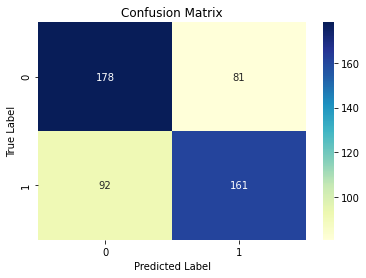


########### Now k is 2 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.62890625
              precision    recall  f1-score   support

           0       0.59      0.86      0.70       259
           1       0.73      0.39      0.51       253

    accuracy                           0.63       512
   macro avg       0.66      0.63      0.61       512
weighted avg       0.66      0.63      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7920743639921722
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1019
           1       1.00      0.59      0.74      1025

    accuracy                           0.79      2044
   macro avg       0.85      0.79      0.78      2044
weighted avg       0.85      0.79      0.78      2044

--------------------------------------------------------


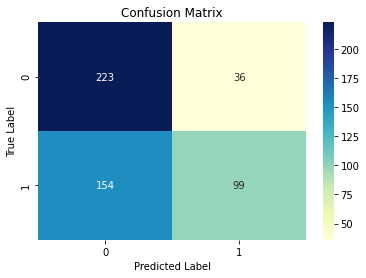


########### Now k is 3 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.642578125
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       259
           1       0.65      0.60      0.62       253

    accuracy                           0.64       512
   macro avg       0.64      0.64      0.64       512
weighted avg       0.64      0.64      0.64       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.8023483365949119
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1019
           1       0.83      0.76      0.79      1025

    accuracy                           0.80      2044
   macro avg       0.80      0.80      0.80      2044
weighted avg       0.80      0.80      0.80      2044

--------------------------------------------------------


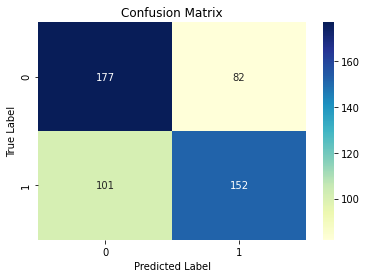


########### Now k is 4 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.6015625
              precision    recall  f1-score   support

           0       0.58      0.81      0.67       259
           1       0.66      0.39      0.49       253

    accuracy                           0.60       512
   macro avg       0.62      0.60      0.58       512
weighted avg       0.62      0.60      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.738747553816047
              precision    recall  f1-score   support

           0       0.67      0.92      0.78      1019
           1       0.87      0.56      0.68      1025

    accuracy                           0.74      2044
   macro avg       0.77      0.74      0.73      2044
weighted avg       0.77      0.74      0.73      2044

--------------------------------------------------------


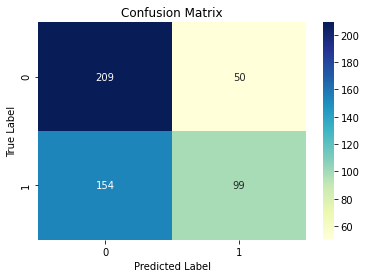


########### Now k is 5 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.615234375
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       259
           1       0.61      0.59      0.60       253

    accuracy                           0.62       512
   macro avg       0.62      0.61      0.61       512
weighted avg       0.62      0.62      0.62       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7460861056751468
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1019
           1       0.76      0.72      0.74      1025

    accuracy                           0.75      2044
   macro avg       0.75      0.75      0.75      2044
weighted avg       0.75      0.75      0.75      2044

--------------------------------------------------------


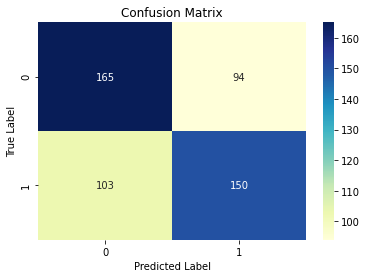


########### Now k is 6 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.58984375
              precision    recall  f1-score   support

           0       0.57      0.75      0.65       259
           1       0.63      0.42      0.50       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.58       512
weighted avg       0.60      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7084148727984344
              precision    recall  f1-score   support

           0       0.66      0.85      0.74      1019
           1       0.79      0.57      0.66      1025

    accuracy                           0.71      2044
   macro avg       0.73      0.71      0.70      2044
weighted avg       0.73      0.71      0.70      2044

--------------------------------------------------------


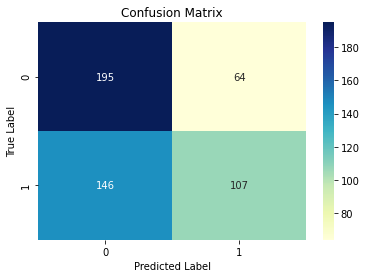


########### Now k is 7 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.623046875
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       259
           1       0.63      0.59      0.61       253

    accuracy                           0.62       512
   macro avg       0.62      0.62      0.62       512
weighted avg       0.62      0.62      0.62       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7333659491193738
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1019
           1       0.75      0.71      0.73      1025

    accuracy                           0.73      2044
   macro avg       0.73      0.73      0.73      2044
weighted avg       0.73      0.73      0.73      2044

--------------------------------------------------------


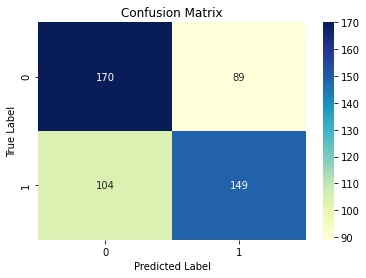


########### Now k is 8 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.607421875
              precision    recall  f1-score   support

           0       0.59      0.75      0.66       259
           1       0.64      0.46      0.54       253

    accuracy                           0.61       512
   macro avg       0.62      0.61      0.60       512
weighted avg       0.62      0.61      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7030332681017613
              precision    recall  f1-score   support

           0       0.66      0.83      0.73      1019
           1       0.77      0.58      0.66      1025

    accuracy                           0.70      2044
   macro avg       0.72      0.70      0.70      2044
weighted avg       0.72      0.70      0.70      2044

--------------------------------------------------------


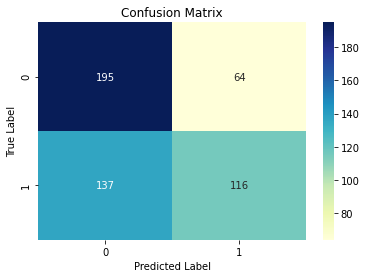


########### Now k is 9 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.580078125
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       259
           1       0.58      0.57      0.57       253

    accuracy                           0.58       512
   macro avg       0.58      0.58      0.58       512
weighted avg       0.58      0.58      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7152641878669276
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1019
           1       0.73      0.69      0.71      1025

    accuracy                           0.72      2044
   macro avg       0.72      0.72      0.72      2044
weighted avg       0.72      0.72      0.72      2044

--------------------------------------------------------


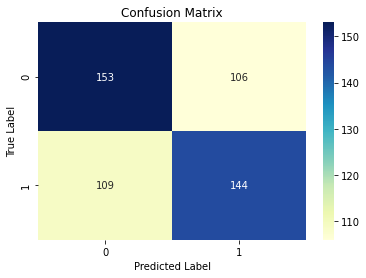


########### Now k is 10 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.6015625
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       259
           1       0.64      0.45      0.53       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.59       512
weighted avg       0.61      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6854207436399217
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1019
           1       0.74      0.57      0.65      1025

    accuracy                           0.69      2044
   macro avg       0.70      0.69      0.68      2044
weighted avg       0.70      0.69      0.68      2044

--------------------------------------------------------


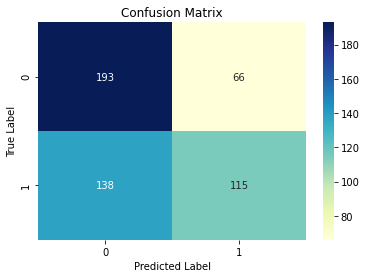


########### Now k is 11 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.61328125
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       259
           1       0.62      0.57      0.59       253

    accuracy                           0.61       512
   macro avg       0.61      0.61      0.61       512
weighted avg       0.61      0.61      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6912915851272016
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1019
           1       0.70      0.67      0.68      1025

    accuracy                           0.69      2044
   macro avg       0.69      0.69      0.69      2044
weighted avg       0.69      0.69      0.69      2044

--------------------------------------------------------


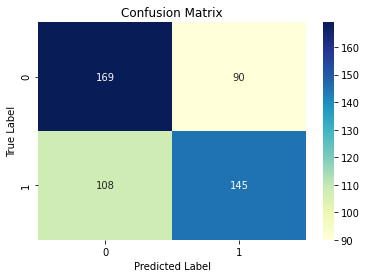


########### Now k is 12 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.607421875
              precision    recall  f1-score   support

           0       0.59      0.76      0.66       259
           1       0.65      0.45      0.53       253

    accuracy                           0.61       512
   macro avg       0.62      0.61      0.60       512
weighted avg       0.62      0.61      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6815068493150684
              precision    recall  f1-score   support

           0       0.65      0.80      0.71      1019
           1       0.74      0.57      0.64      1025

    accuracy                           0.68      2044
   macro avg       0.69      0.68      0.68      2044
weighted avg       0.69      0.68      0.68      2044

--------------------------------------------------------


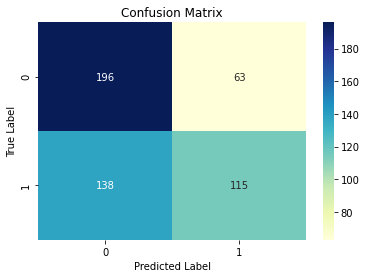


########### Now k is 13 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.583984375
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       259
           1       0.59      0.54      0.56       253

    accuracy                           0.58       512
   macro avg       0.58      0.58      0.58       512
weighted avg       0.58      0.58      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6873776908023483
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1019
           1       0.70      0.66      0.68      1025

    accuracy                           0.69      2044
   macro avg       0.69      0.69      0.69      2044
weighted avg       0.69      0.69      0.69      2044

--------------------------------------------------------


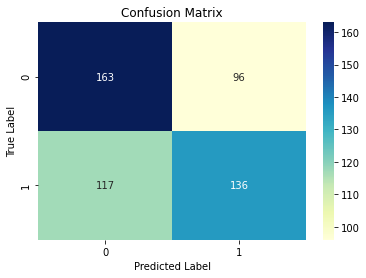


########### Now k is 14 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.595703125
              precision    recall  f1-score   support

           0       0.58      0.73      0.64       259
           1       0.62      0.46      0.53       253

    accuracy                           0.60       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6687866927592955
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1019
           1       0.72      0.56      0.63      1025

    accuracy                           0.67      2044
   macro avg       0.68      0.67      0.66      2044
weighted avg       0.68      0.67      0.66      2044

--------------------------------------------------------


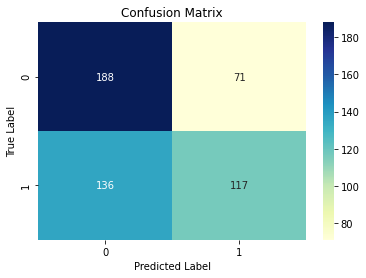


########### Now k is 15 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       259
           1       0.60      0.57      0.58       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.60       512
weighted avg       0.60      0.60      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6604696673189824
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1019
           1       0.68      0.62      0.65      1025

    accuracy                           0.66      2044
   macro avg       0.66      0.66      0.66      2044
weighted avg       0.66      0.66      0.66      2044

--------------------------------------------------------


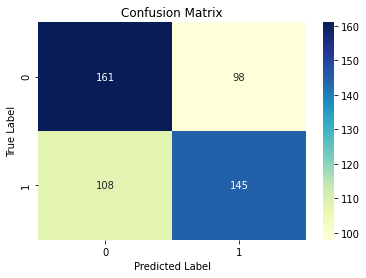


########### Now k is 16 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.615234375
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       259
           1       0.64      0.49      0.56       253

    accuracy                           0.62       512
   macro avg       0.62      0.61      0.61       512
weighted avg       0.62      0.62      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6585127201565558
              precision    recall  f1-score   support

           0       0.63      0.77      0.69      1019
           1       0.70      0.55      0.62      1025

    accuracy                           0.66      2044
   macro avg       0.67      0.66      0.65      2044
weighted avg       0.67      0.66      0.65      2044

--------------------------------------------------------


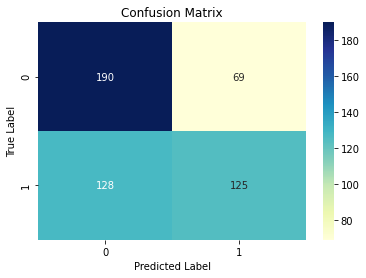


########### Now k is 17 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.60546875
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       259
           1       0.61      0.55      0.58       253

    accuracy                           0.61       512
   macro avg       0.61      0.60      0.60       512
weighted avg       0.61      0.61      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6560665362035225
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1019
           1       0.67      0.62      0.64      1025

    accuracy                           0.66      2044
   macro avg       0.66      0.66      0.66      2044
weighted avg       0.66      0.66      0.66      2044

--------------------------------------------------------


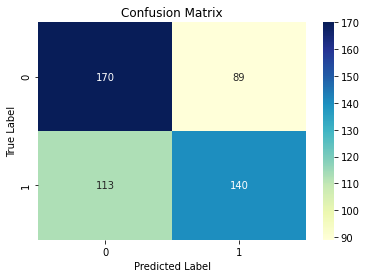


########### Now k is 18 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.615234375
              precision    recall  f1-score   support

           0       0.60      0.74      0.66       259
           1       0.65      0.49      0.56       253

    accuracy                           0.62       512
   macro avg       0.62      0.61      0.61       512
weighted avg       0.62      0.62      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6570450097847358
              precision    recall  f1-score   support

           0       0.63      0.76      0.69      1019
           1       0.70      0.55      0.62      1025

    accuracy                           0.66      2044
   macro avg       0.66      0.66      0.65      2044
weighted avg       0.66      0.66      0.65      2044

--------------------------------------------------------


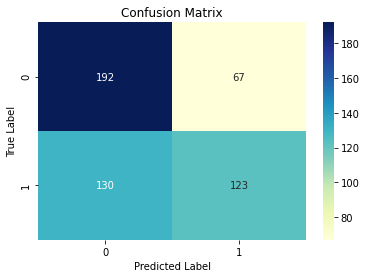


########### Now k is 19 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.61328125
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       259
           1       0.62      0.57      0.59       253

    accuracy                           0.61       512
   macro avg       0.61      0.61      0.61       512
weighted avg       0.61      0.61      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6580234833659491
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1019
           1       0.67      0.62      0.65      1025

    accuracy                           0.66      2044
   macro avg       0.66      0.66      0.66      2044
weighted avg       0.66      0.66      0.66      2044

--------------------------------------------------------


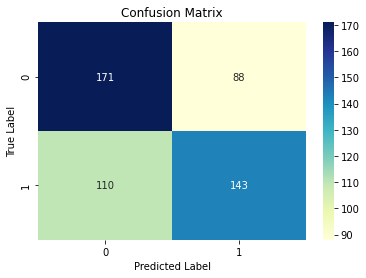


########### Now k is 20 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.61328125
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       259
           1       0.64      0.49      0.56       253

    accuracy                           0.61       512
   macro avg       0.62      0.61      0.61       512
weighted avg       0.62      0.61      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6565557729941291
              precision    recall  f1-score   support

           0       0.63      0.77      0.69      1019
           1       0.70      0.55      0.62      1025

    accuracy                           0.66      2044
   macro avg       0.66      0.66      0.65      2044
weighted avg       0.66      0.66      0.65      2044

--------------------------------------------------------


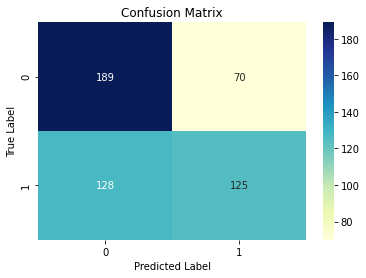


########### Now k is 21 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.6171875
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       259
           1       0.62      0.58      0.60       253

    accuracy                           0.62       512
   macro avg       0.62      0.62      0.62       512
weighted avg       0.62      0.62      0.62       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6619373776908023
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1019
           1       0.68      0.62      0.65      1025

    accuracy                           0.66      2044
   macro avg       0.66      0.66      0.66      2044
weighted avg       0.66      0.66      0.66      2044

--------------------------------------------------------


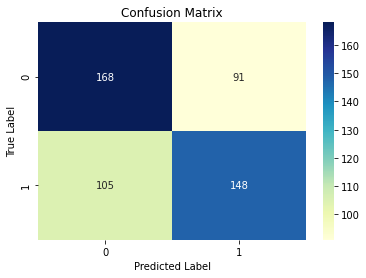


########### Now k is 22 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.61328125
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       259
           1       0.64      0.51      0.57       253

    accuracy                           0.61       512
   macro avg       0.62      0.61      0.61       512
weighted avg       0.62      0.61      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6477495107632094
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      1019
           1       0.69      0.54      0.61      1025

    accuracy                           0.65      2044
   macro avg       0.65      0.65      0.64      2044
weighted avg       0.65      0.65      0.64      2044

--------------------------------------------------------


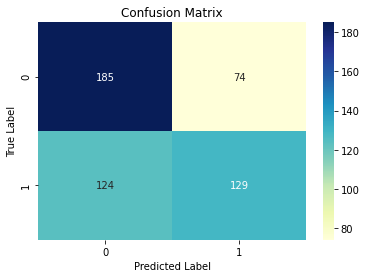


########### Now k is 23 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.591796875
              precision    recall  f1-score   support

           0       0.59      0.62      0.61       259
           1       0.59      0.56      0.58       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.59       512
weighted avg       0.59      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.649706457925636
              precision    recall  f1-score   support

           0       0.64      0.69      0.66      1019
           1       0.66      0.61      0.64      1025

    accuracy                           0.65      2044
   macro avg       0.65      0.65      0.65      2044
weighted avg       0.65      0.65      0.65      2044

--------------------------------------------------------


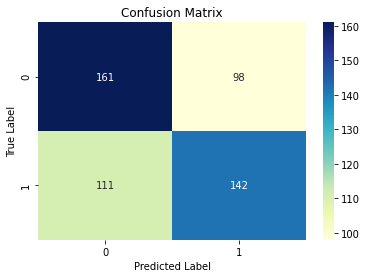


########### Now k is 24 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.587890625
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       259
           1       0.62      0.44      0.51       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.58       512
weighted avg       0.59      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6364970645792564
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1019
           1       0.67      0.53      0.59      1025

    accuracy                           0.64      2044
   macro avg       0.64      0.64      0.63      2044
weighted avg       0.64      0.64      0.63      2044

--------------------------------------------------------


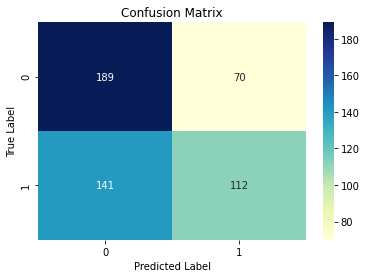


########### Now k is 25 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.6171875
              precision    recall  f1-score   support

           0       0.61      0.69      0.64       259
           1       0.63      0.55      0.58       253

    accuracy                           0.62       512
   macro avg       0.62      0.62      0.61       512
weighted avg       0.62      0.62      0.62       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6404109589041096
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      1019
           1       0.65      0.60      0.63      1025

    accuracy                           0.64      2044
   macro avg       0.64      0.64      0.64      2044
weighted avg       0.64      0.64      0.64      2044

--------------------------------------------------------


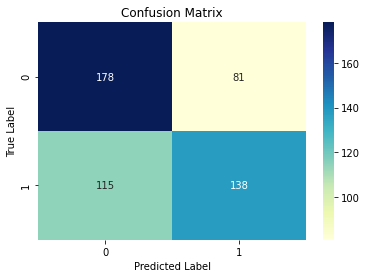


########### Now k is 26 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.595703125
              precision    recall  f1-score   support

           0       0.58      0.73      0.65       259
           1       0.62      0.46      0.53       253

    accuracy                           0.60       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6316046966731899
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1019
           1       0.67      0.53      0.59      1025

    accuracy                           0.63      2044
   macro avg       0.64      0.63      0.63      2044
weighted avg       0.64      0.63      0.63      2044

--------------------------------------------------------


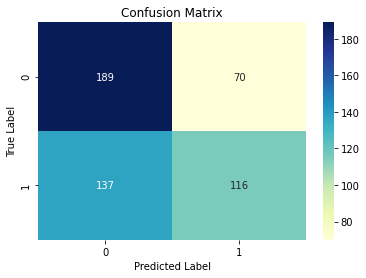


########### Now k is 27 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.609375
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       259
           1       0.62      0.54      0.58       253

    accuracy                           0.61       512
   macro avg       0.61      0.61      0.61       512
weighted avg       0.61      0.61      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6340508806262231
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1019
           1       0.65      0.59      0.62      1025

    accuracy                           0.63      2044
   macro avg       0.64      0.63      0.63      2044
weighted avg       0.64      0.63      0.63      2044

--------------------------------------------------------


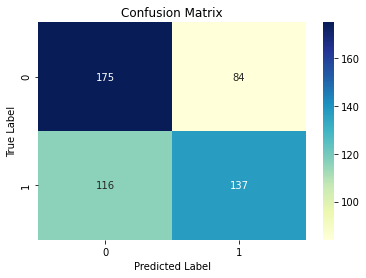


########### Now k is 28 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       259
           1       0.63      0.45      0.52       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.59       512
weighted avg       0.61      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6262230919765166
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1019
           1       0.66      0.52      0.58      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.62      2044
weighted avg       0.63      0.63      0.62      2044

--------------------------------------------------------


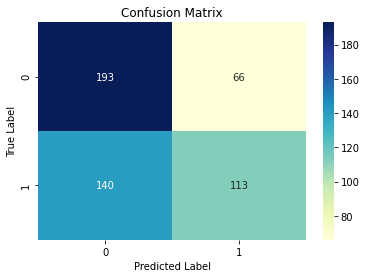


########### Now k is 29 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.583984375
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       259
           1       0.59      0.53      0.56       253

    accuracy                           0.58       512
   macro avg       0.58      0.58      0.58       512
weighted avg       0.58      0.58      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6311154598825832
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1019
           1       0.65      0.58      0.61      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.63      2044
weighted avg       0.63      0.63      0.63      2044

--------------------------------------------------------


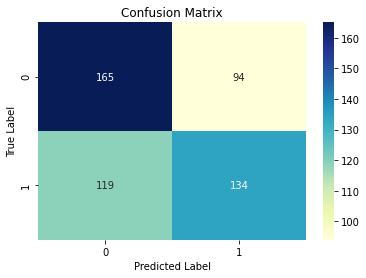


########### Now k is 30 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59375
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       259
           1       0.62      0.46      0.53       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6306262230919765
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1019
           1       0.67      0.52      0.59      1025

    accuracy                           0.63      2044
   macro avg       0.64      0.63      0.63      2044
weighted avg       0.64      0.63      0.63      2044

--------------------------------------------------------


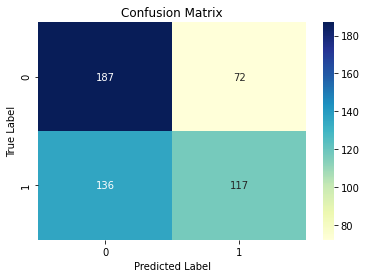


########### Now k is 31 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.57421875
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       259
           1       0.58      0.51      0.54       253

    accuracy                           0.57       512
   macro avg       0.57      0.57      0.57       512
weighted avg       0.57      0.57      0.57       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6262230919765166
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1019
           1       0.64      0.59      0.61      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.63      2044
weighted avg       0.63      0.63      0.63      2044

--------------------------------------------------------


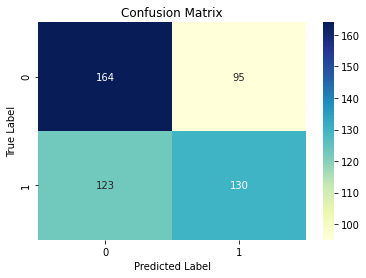


########### Now k is 32 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59375
              precision    recall  f1-score   support

           0       0.58      0.70      0.64       259
           1       0.61      0.49      0.54       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6276908023483366
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1019
           1       0.66      0.52      0.58      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.62      2044
weighted avg       0.63      0.63      0.62      2044

--------------------------------------------------------


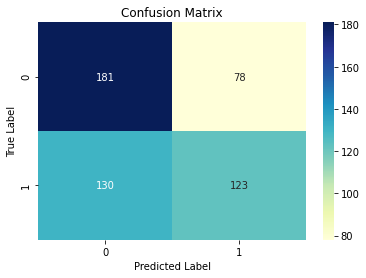


########### Now k is 33 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.578125
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       259
           1       0.58      0.51      0.54       253

    accuracy                           0.58       512
   macro avg       0.58      0.58      0.58       512
weighted avg       0.58      0.58      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.62573385518591
              precision    recall  f1-score   support

           0       0.61      0.68      0.65      1019
           1       0.64      0.57      0.60      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.62      2044
weighted avg       0.63      0.63      0.62      2044

--------------------------------------------------------


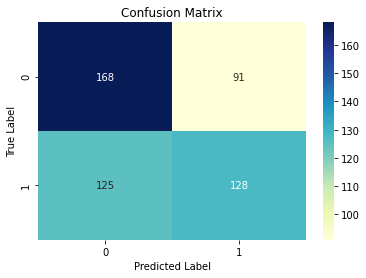


########### Now k is 34 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.595703125
              precision    recall  f1-score   support

           0       0.58      0.74      0.65       259
           1       0.63      0.45      0.52       253

    accuracy                           0.60       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6252446183953033
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1019
           1       0.66      0.52      0.58      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.62      2044
weighted avg       0.63      0.63      0.62      2044

--------------------------------------------------------


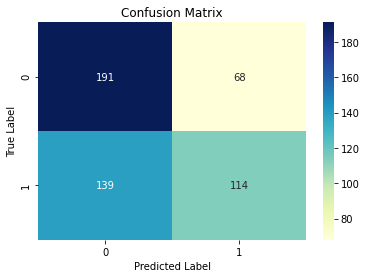


########### Now k is 35 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.6015625
              precision    recall  f1-score   support

           0       0.59      0.67      0.63       259
           1       0.61      0.53      0.57       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.60       512
weighted avg       0.60      0.60      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6335616438356164
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1019
           1       0.65      0.58      0.61      1025

    accuracy                           0.63      2044
   macro avg       0.64      0.63      0.63      2044
weighted avg       0.64      0.63      0.63      2044

--------------------------------------------------------


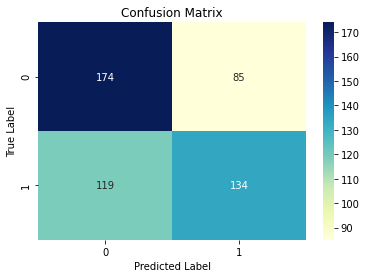


########### Now k is 36 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.603515625
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       259
           1       0.63      0.48      0.55       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.60       512
weighted avg       0.61      0.60      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6316046966731899
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1019
           1       0.67      0.52      0.59      1025

    accuracy                           0.63      2044
   macro avg       0.64      0.63      0.63      2044
weighted avg       0.64      0.63      0.63      2044

--------------------------------------------------------


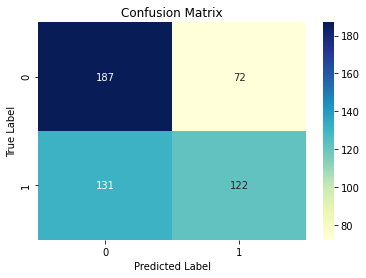


########### Now k is 37 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.61328125
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       259
           1       0.63      0.54      0.58       253

    accuracy                           0.61       512
   macro avg       0.61      0.61      0.61       512
weighted avg       0.61      0.61      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6413894324853229
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      1019
           1       0.66      0.58      0.62      1025

    accuracy                           0.64      2044
   macro avg       0.64      0.64      0.64      2044
weighted avg       0.64      0.64      0.64      2044

--------------------------------------------------------


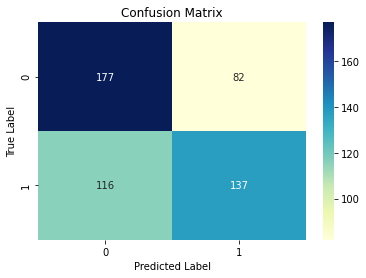


########### Now k is 38 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.611328125
              precision    recall  f1-score   support

           0       0.59      0.74      0.66       259
           1       0.64      0.48      0.55       253

    accuracy                           0.61       512
   macro avg       0.62      0.61      0.60       512
weighted avg       0.62      0.61      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6306262230919765
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1019
           1       0.67      0.52      0.59      1025

    accuracy                           0.63      2044
   macro avg       0.64      0.63      0.63      2044
weighted avg       0.64      0.63      0.63      2044

--------------------------------------------------------


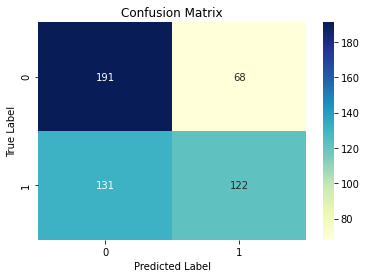


########### Now k is 39 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.609375
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       259
           1       0.62      0.53      0.57       253

    accuracy                           0.61       512
   macro avg       0.61      0.61      0.61       512
weighted avg       0.61      0.61      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6345401174168297
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1019
           1       0.65      0.58      0.61      1025

    accuracy                           0.63      2044
   macro avg       0.64      0.63      0.63      2044
weighted avg       0.64      0.63      0.63      2044

--------------------------------------------------------


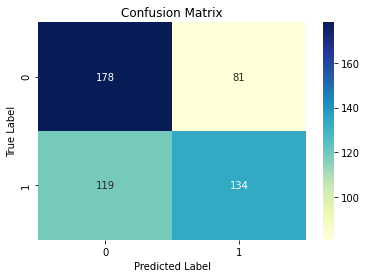


########### Now k is 40 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.607421875
              precision    recall  f1-score   support

           0       0.59      0.74      0.66       259
           1       0.64      0.47      0.54       253

    accuracy                           0.61       512
   macro avg       0.61      0.61      0.60       512
weighted avg       0.61      0.61      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6345401174168297
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1019
           1       0.67      0.53      0.59      1025

    accuracy                           0.63      2044
   macro avg       0.64      0.63      0.63      2044
weighted avg       0.64      0.63      0.63      2044

--------------------------------------------------------


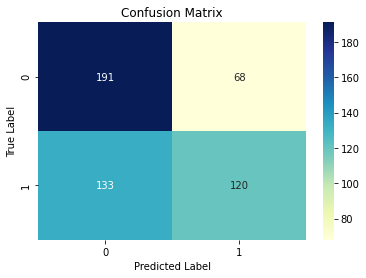


########### Now k is 41 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.609375
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       259
           1       0.62      0.54      0.58       253

    accuracy                           0.61       512
   macro avg       0.61      0.61      0.61       512
weighted avg       0.61      0.61      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6330724070450098
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1019
           1       0.65      0.57      0.61      1025

    accuracy                           0.63      2044
   macro avg       0.64      0.63      0.63      2044
weighted avg       0.64      0.63      0.63      2044

--------------------------------------------------------


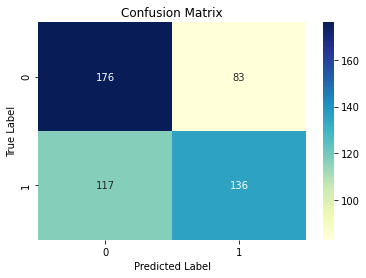


########### Now k is 42 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59375
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       259
           1       0.62      0.47      0.53       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6262230919765166
              precision    recall  f1-score   support

           0       0.60      0.73      0.66      1019
           1       0.66      0.52      0.58      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.62      2044
weighted avg       0.63      0.63      0.62      2044

--------------------------------------------------------


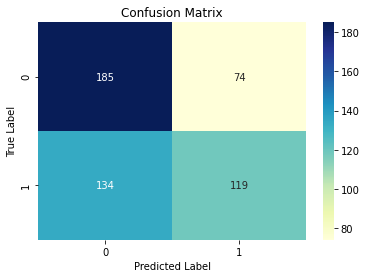


########### Now k is 43 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.603515625
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       259
           1       0.62      0.51      0.56       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.60       512
weighted avg       0.61      0.60      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.62720156555773
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1019
           1       0.65      0.56      0.60      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.63      2044
weighted avg       0.63      0.63      0.63      2044

--------------------------------------------------------


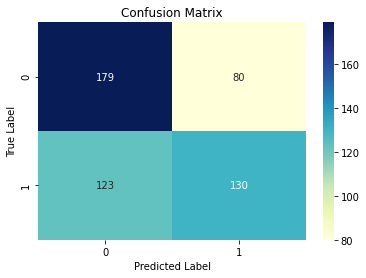


########### Now k is 44 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.587890625
              precision    recall  f1-score   support

           0       0.57      0.72      0.64       259
           1       0.61      0.45      0.52       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.58       512
weighted avg       0.59      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6281800391389433
              precision    recall  f1-score   support

           0       0.60      0.74      0.67      1019
           1       0.67      0.52      0.58      1025

    accuracy                           0.63      2044
   macro avg       0.64      0.63      0.62      2044
weighted avg       0.64      0.63      0.62      2044

--------------------------------------------------------


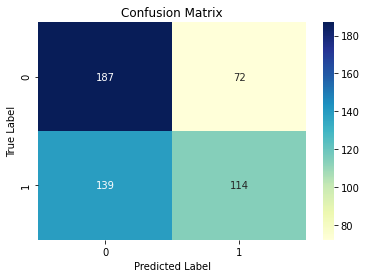


########### Now k is 45 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.595703125
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       259
           1       0.61      0.49      0.55       253

    accuracy                           0.60       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.62720156555773
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      1019
           1       0.65      0.55      0.60      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.63      2044
weighted avg       0.63      0.63      0.63      2044

--------------------------------------------------------


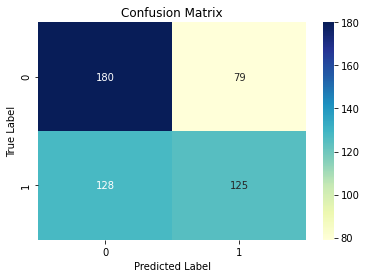


########### Now k is 46 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.580078125
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       259
           1       0.60      0.44      0.51       253

    accuracy                           0.58       512
   macro avg       0.58      0.58      0.57       512
weighted avg       0.58      0.58      0.57       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6262230919765166
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1019
           1       0.66      0.51      0.58      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.62      2044
weighted avg       0.63      0.63      0.62      2044

--------------------------------------------------------


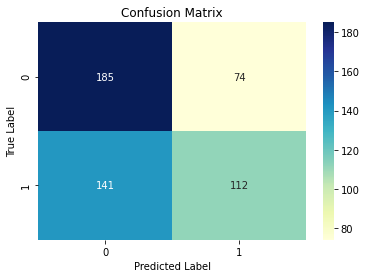


########### Now k is 47 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.599609375
              precision    recall  f1-score   support

           0       0.59      0.68      0.63       259
           1       0.61      0.52      0.56       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.60       512
weighted avg       0.60      0.60      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6237769080234834
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1019
           1       0.65      0.55      0.60      1025

    accuracy                           0.62      2044
   macro avg       0.63      0.62      0.62      2044
weighted avg       0.63      0.62      0.62      2044

--------------------------------------------------------


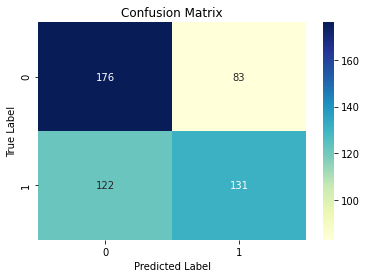


########### Now k is 48 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.58984375
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       259
           1       0.61      0.46      0.53       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.58       512
weighted avg       0.59      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6223091976516634
              precision    recall  f1-score   support

           0       0.60      0.73      0.66      1019
           1       0.66      0.51      0.58      1025

    accuracy                           0.62      2044
   macro avg       0.63      0.62      0.62      2044
weighted avg       0.63      0.62      0.62      2044

--------------------------------------------------------


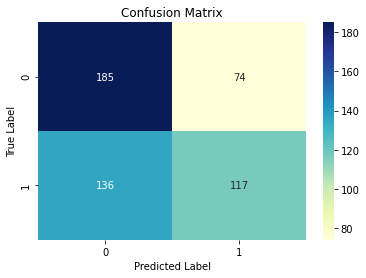


########### Now k is 49 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.587890625
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       259
           1       0.60      0.52      0.55       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.59       512
weighted avg       0.59      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6213307240704501
              precision    recall  f1-score   support

           0       0.61      0.69      0.64      1019
           1       0.64      0.56      0.60      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.62      2044
weighted avg       0.62      0.62      0.62      2044

--------------------------------------------------------


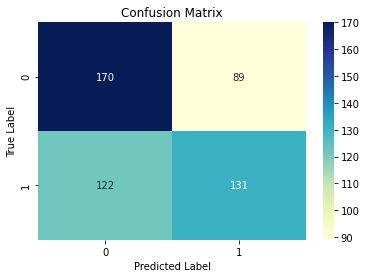


########### Now k is 50 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.572265625
              precision    recall  f1-score   support

           0       0.56      0.69      0.62       259
           1       0.59      0.45      0.51       253

    accuracy                           0.57       512
   macro avg       0.58      0.57      0.57       512
weighted avg       0.58      0.57      0.57       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6164383561643836
              precision    recall  f1-score   support

           0       0.59      0.73      0.65      1019
           1       0.65      0.51      0.57      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.61      2044
weighted avg       0.62      0.62      0.61      2044

--------------------------------------------------------


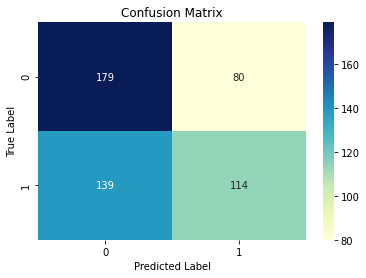


########### Now k is 51 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.583984375
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       259
           1       0.59      0.51      0.55       253

    accuracy                           0.58       512
   macro avg       0.59      0.58      0.58       512
weighted avg       0.59      0.58      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6262230919765166
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      1019
           1       0.65      0.55      0.60      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.62      2044
weighted avg       0.63      0.63      0.62      2044

--------------------------------------------------------


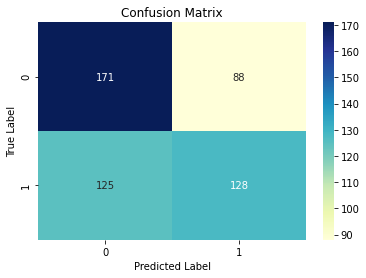


########### Now k is 52 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.58203125
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       259
           1       0.60      0.45      0.52       253

    accuracy                           0.58       512
   macro avg       0.59      0.58      0.57       512
weighted avg       0.59      0.58      0.57       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6203522504892368
              precision    recall  f1-score   support

           0       0.60      0.73      0.66      1019
           1       0.66      0.51      0.57      1025

    accuracy                           0.62      2044
   macro avg       0.63      0.62      0.62      2044
weighted avg       0.63      0.62      0.62      2044

--------------------------------------------------------


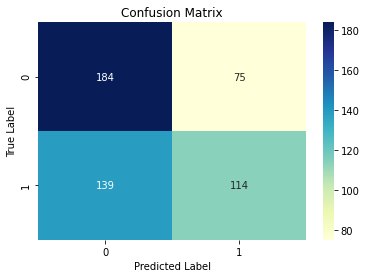


########### Now k is 53 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.59      0.68      0.63       259
           1       0.61      0.52      0.56       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.59       512
weighted avg       0.60      0.60      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6154598825831703
              precision    recall  f1-score   support

           0       0.60      0.69      0.64      1019
           1       0.64      0.55      0.59      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.61      2044
weighted avg       0.62      0.62      0.61      2044

--------------------------------------------------------


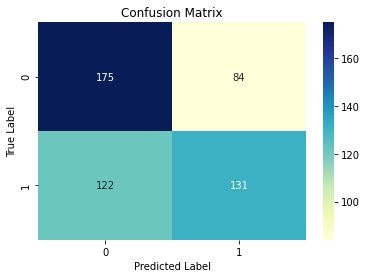


########### Now k is 54 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.58203125
              precision    recall  f1-score   support

           0       0.57      0.69      0.63       259
           1       0.60      0.47      0.53       253

    accuracy                           0.58       512
   macro avg       0.58      0.58      0.58       512
weighted avg       0.58      0.58      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6149706457925636
              precision    recall  f1-score   support

           0       0.59      0.73      0.65      1019
           1       0.65      0.50      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.62      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


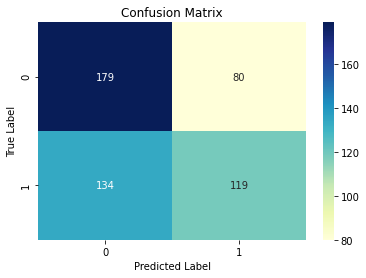


########### Now k is 55 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.59      0.67      0.63       259
           1       0.61      0.53      0.56       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.60       512
weighted avg       0.60      0.60      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6262230919765166
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      1019
           1       0.65      0.55      0.60      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.62      2044
weighted avg       0.63      0.63      0.62      2044

--------------------------------------------------------


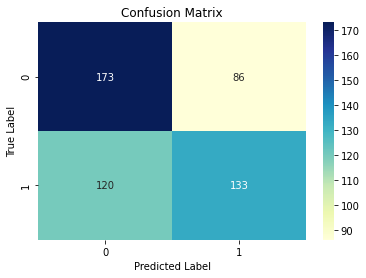


########### Now k is 56 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.578125
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       259
           1       0.60      0.45      0.51       253

    accuracy                           0.58       512
   macro avg       0.58      0.58      0.57       512
weighted avg       0.58      0.58      0.57       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6267123287671232
              precision    recall  f1-score   support

           0       0.60      0.75      0.67      1019
           1       0.67      0.51      0.58      1025

    accuracy                           0.63      2044
   macro avg       0.63      0.63      0.62      2044
weighted avg       0.63      0.63      0.62      2044

--------------------------------------------------------


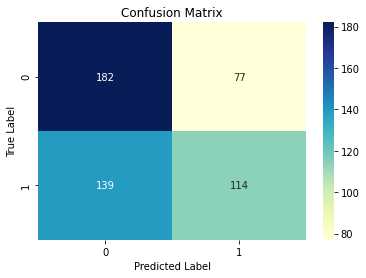


########### Now k is 57 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.580078125
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       259
           1       0.59      0.50      0.54       253

    accuracy                           0.58       512
   macro avg       0.58      0.58      0.58       512
weighted avg       0.58      0.58      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.62279843444227
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      1019
           1       0.65      0.55      0.59      1025

    accuracy                           0.62      2044
   macro avg       0.63      0.62      0.62      2044
weighted avg       0.63      0.62      0.62      2044

--------------------------------------------------------


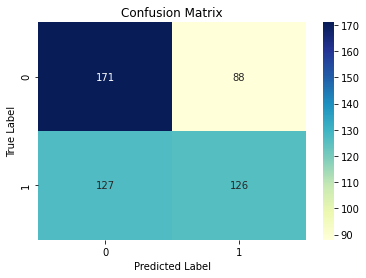


########### Now k is 58 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.576171875
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       259
           1       0.59      0.45      0.51       253

    accuracy                           0.58       512
   macro avg       0.58      0.57      0.57       512
weighted avg       0.58      0.58      0.57       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6203522504892368
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1019
           1       0.66      0.50      0.57      1025

    accuracy                           0.62      2044
   macro avg       0.63      0.62      0.61      2044
weighted avg       0.63      0.62      0.61      2044

--------------------------------------------------------


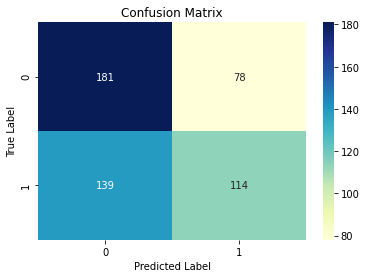


########### Now k is 59 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.591796875
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       259
           1       0.60      0.51      0.55       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.59       512
weighted avg       0.59      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6120352250489237
              precision    recall  f1-score   support

           0       0.60      0.69      0.64      1019
           1       0.63      0.53      0.58      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


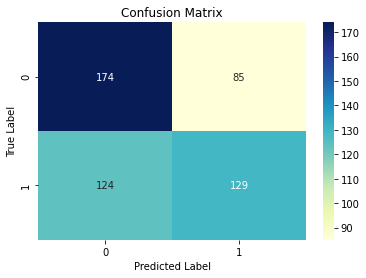


########### Now k is 60 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.587890625
              precision    recall  f1-score   support

           0       0.57      0.71      0.64       259
           1       0.61      0.46      0.52       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.58       512
weighted avg       0.59      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.613013698630137
              precision    recall  f1-score   support

           0       0.59      0.74      0.66      1019
           1       0.65      0.49      0.56      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


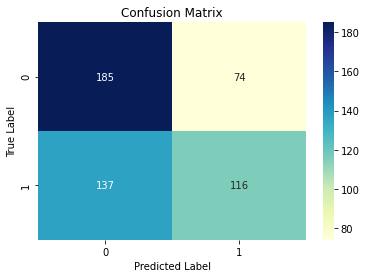


########### Now k is 61 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.587890625
              precision    recall  f1-score   support

           0       0.58      0.68      0.62       259
           1       0.60      0.50      0.54       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.58       512
weighted avg       0.59      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6169275929549902
              precision    recall  f1-score   support

           0       0.60      0.70      0.64      1019
           1       0.64      0.54      0.58      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.61      2044
weighted avg       0.62      0.62      0.61      2044

--------------------------------------------------------


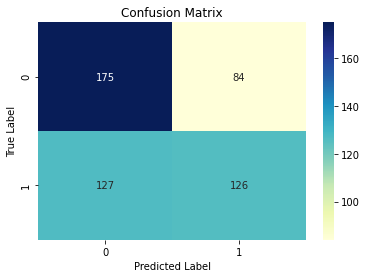


########### Now k is 62 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.58984375
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       259
           1       0.62      0.44      0.52       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.58       512
weighted avg       0.60      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6144814090019569
              precision    recall  f1-score   support

           0       0.59      0.74      0.66      1019
           1       0.65      0.49      0.56      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


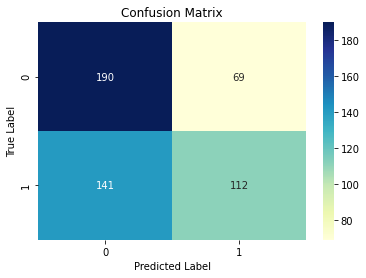


########### Now k is 63 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.583984375
              precision    recall  f1-score   support

           0       0.57      0.68      0.62       259
           1       0.60      0.48      0.53       253

    accuracy                           0.58       512
   macro avg       0.59      0.58      0.58       512
weighted avg       0.59      0.58      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6179060665362035
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      1019
           1       0.64      0.53      0.58      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.62      2044
weighted avg       0.62      0.62      0.62      2044

--------------------------------------------------------


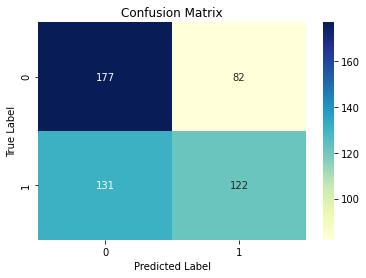


########### Now k is 64 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.591796875
              precision    recall  f1-score   support

           0       0.58      0.73      0.64       259
           1       0.62      0.45      0.52       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.58       512
weighted avg       0.60      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6183953033268101
              precision    recall  f1-score   support

           0       0.59      0.74      0.66      1019
           1       0.66      0.50      0.57      1025

    accuracy                           0.62      2044
   macro avg       0.63      0.62      0.61      2044
weighted avg       0.63      0.62      0.61      2044

--------------------------------------------------------


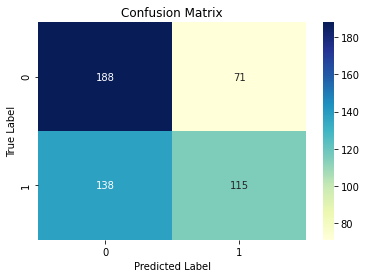


########### Now k is 65 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.58984375
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       259
           1       0.60      0.49      0.54       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.59       512
weighted avg       0.59      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6120352250489237
              precision    recall  f1-score   support

           0       0.60      0.69      0.64      1019
           1       0.63      0.53      0.58      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


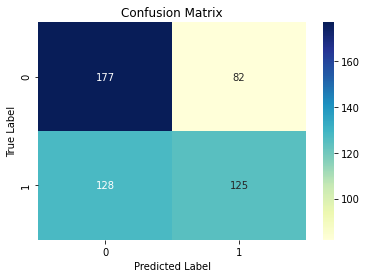


########### Now k is 66 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.58984375
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       259
           1       0.62      0.45      0.52       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.58       512
weighted avg       0.60      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6179060665362035
              precision    recall  f1-score   support

           0       0.59      0.74      0.66      1019
           1       0.66      0.49      0.56      1025

    accuracy                           0.62      2044
   macro avg       0.63      0.62      0.61      2044
weighted avg       0.63      0.62      0.61      2044

--------------------------------------------------------


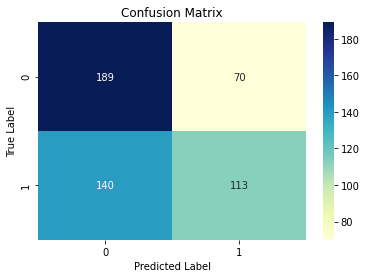


########### Now k is 67 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.583984375
              precision    recall  f1-score   support

           0       0.58      0.68      0.62       259
           1       0.60      0.49      0.54       253

    accuracy                           0.58       512
   macro avg       0.59      0.58      0.58       512
weighted avg       0.59      0.58      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6135029354207436
              precision    recall  f1-score   support

           0       0.60      0.70      0.64      1019
           1       0.64      0.53      0.58      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


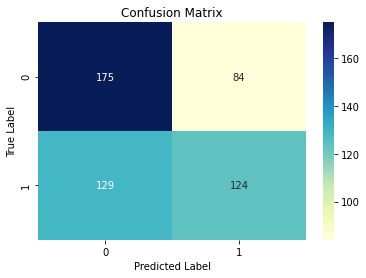


########### Now k is 68 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59375
              precision    recall  f1-score   support

           0       0.58      0.73      0.64       259
           1       0.62      0.46      0.53       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6169275929549902
              precision    recall  f1-score   support

           0       0.59      0.74      0.66      1019
           1       0.66      0.50      0.56      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.61      2044
weighted avg       0.62      0.62      0.61      2044

--------------------------------------------------------


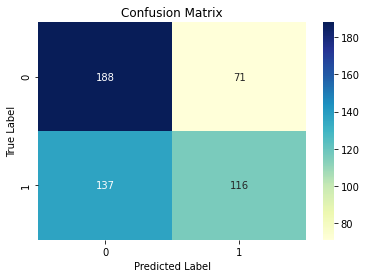


########### Now k is 69 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59375
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       259
           1       0.61      0.51      0.55       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6179060665362035
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      1019
           1       0.64      0.54      0.58      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.62      2044
weighted avg       0.62      0.62      0.62      2044

--------------------------------------------------------


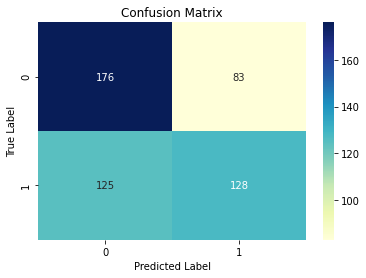


########### Now k is 70 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.58      0.74      0.65       259
           1       0.63      0.45      0.53       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6159491193737769
              precision    recall  f1-score   support

           0       0.59      0.73      0.66      1019
           1       0.65      0.50      0.57      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.61      2044
weighted avg       0.62      0.62      0.61      2044

--------------------------------------------------------


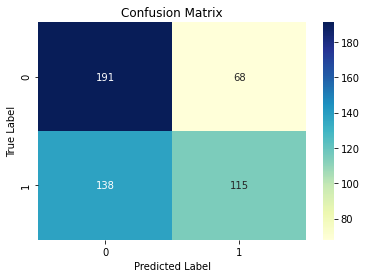


########### Now k is 71 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.59      0.70      0.64       259
           1       0.62      0.49      0.55       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6135029354207436
              precision    recall  f1-score   support

           0       0.60      0.70      0.64      1019
           1       0.64      0.53      0.58      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


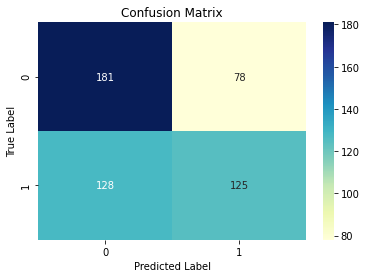


########### Now k is 72 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.603515625
              precision    recall  f1-score   support

           0       0.58      0.75      0.66       259
           1       0.64      0.45      0.53       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.59       512
weighted avg       0.61      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6125244618395304
              precision    recall  f1-score   support

           0       0.59      0.73      0.65      1019
           1       0.65      0.49      0.56      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


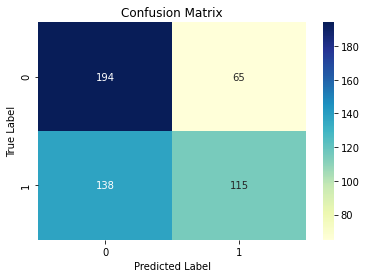


########### Now k is 73 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.607421875
              precision    recall  f1-score   support

           0       0.59      0.71      0.65       259
           1       0.63      0.51      0.56       253

    accuracy                           0.61       512
   macro avg       0.61      0.61      0.60       512
weighted avg       0.61      0.61      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6095890410958904
              precision    recall  f1-score   support

           0       0.59      0.69      0.64      1019
           1       0.63      0.53      0.58      1025

    accuracy                           0.61      2044
   macro avg       0.61      0.61      0.61      2044
weighted avg       0.61      0.61      0.61      2044

--------------------------------------------------------


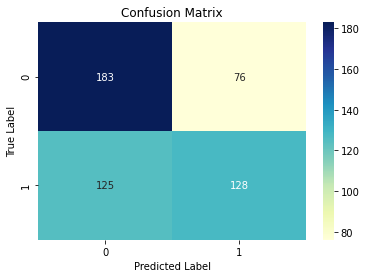


########### Now k is 74 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.60546875
              precision    recall  f1-score   support

           0       0.58      0.76      0.66       259
           1       0.65      0.45      0.53       253

    accuracy                           0.61       512
   macro avg       0.62      0.60      0.59       512
weighted avg       0.61      0.61      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6154598825831703
              precision    recall  f1-score   support

           0       0.59      0.73      0.66      1019
           1       0.65      0.50      0.56      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.61      2044
weighted avg       0.62      0.62      0.61      2044

--------------------------------------------------------


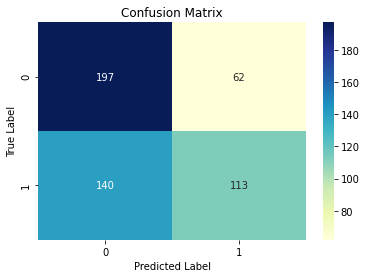


########### Now k is 75 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.61328125
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       259
           1       0.64      0.50      0.56       253

    accuracy                           0.61       512
   macro avg       0.62      0.61      0.61       512
weighted avg       0.62      0.61      0.61       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6086105675146771
              precision    recall  f1-score   support

           0       0.59      0.70      0.64      1019
           1       0.63      0.52      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.61      0.61      0.61      2044
weighted avg       0.61      0.61      0.61      2044

--------------------------------------------------------


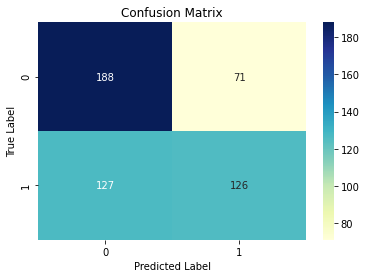


########### Now k is 76 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.6015625
              precision    recall  f1-score   support

           0       0.58      0.75      0.66       259
           1       0.64      0.45      0.53       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.59       512
weighted avg       0.61      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6183953033268101
              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1019
           1       0.66      0.49      0.56      1025

    accuracy                           0.62      2044
   macro avg       0.63      0.62      0.61      2044
weighted avg       0.63      0.62      0.61      2044

--------------------------------------------------------


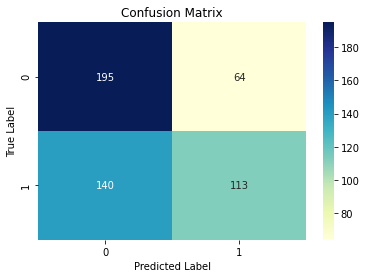


########### Now k is 77 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.59      0.70      0.64       259
           1       0.62      0.49      0.55       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6183953033268101
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1019
           1       0.65      0.52      0.58      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.62      2044
weighted avg       0.62      0.62      0.62      2044

--------------------------------------------------------


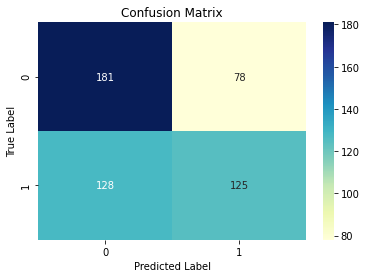


########### Now k is 78 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.591796875
              precision    recall  f1-score   support

           0       0.58      0.73      0.64       259
           1       0.62      0.45      0.52       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.58       512
weighted avg       0.60      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6169275929549902
              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1019
           1       0.66      0.49      0.56      1025

    accuracy                           0.62      2044
   macro avg       0.63      0.62      0.61      2044
weighted avg       0.63      0.62      0.61      2044

--------------------------------------------------------


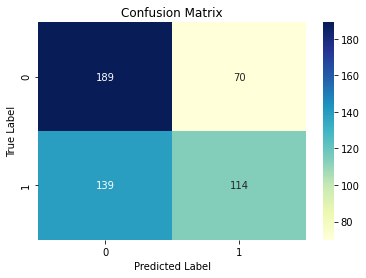


########### Now k is 79 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.591796875
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       259
           1       0.61      0.49      0.54       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.59       512
weighted avg       0.59      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6125244618395304
              precision    recall  f1-score   support

           0       0.59      0.71      0.65      1019
           1       0.64      0.52      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


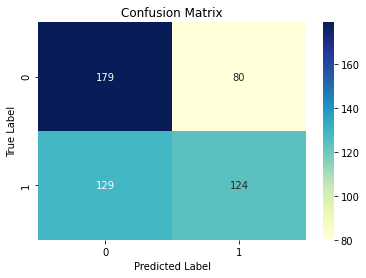


########### Now k is 80 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.58      0.73      0.65       259
           1       0.63      0.46      0.53       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.613013698630137
              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1019
           1       0.66      0.48      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


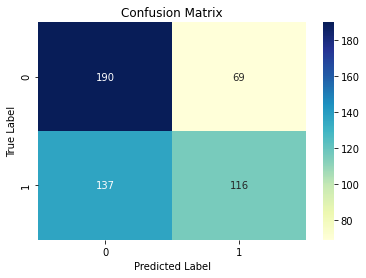


########### Now k is 81 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.607421875
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       259
           1       0.63      0.49      0.55       253

    accuracy                           0.61       512
   macro avg       0.61      0.61      0.60       512
weighted avg       0.61      0.61      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6169275929549902
              precision    recall  f1-score   support

           0       0.60      0.72      0.65      1019
           1       0.65      0.52      0.58      1025

    accuracy                           0.62      2044
   macro avg       0.62      0.62      0.61      2044
weighted avg       0.62      0.62      0.61      2044

--------------------------------------------------------


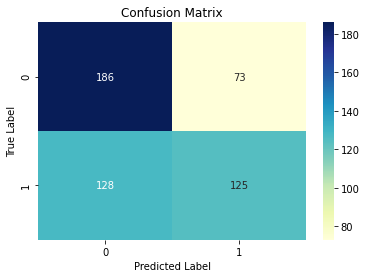


########### Now k is 82 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.591796875
              precision    recall  f1-score   support

           0       0.57      0.75      0.65       259
           1       0.63      0.43      0.51       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.58       512
weighted avg       0.60      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6135029354207436
              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1019
           1       0.66      0.48      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


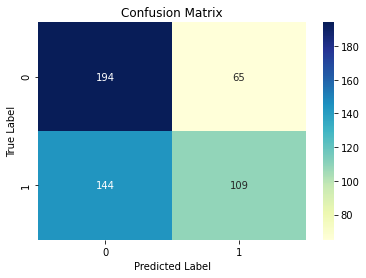


########### Now k is 83 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59375
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       259
           1       0.61      0.48      0.54       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6115459882583171
              precision    recall  f1-score   support

           0       0.59      0.71      0.65      1019
           1       0.64      0.51      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


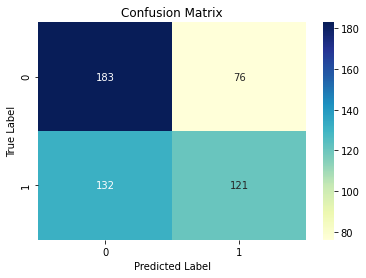


########### Now k is 84 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.58984375
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       259
           1       0.62      0.44      0.52       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.58       512
weighted avg       0.60      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6066536203522505
              precision    recall  f1-score   support

           0       0.58      0.74      0.65      1019
           1       0.65      0.48      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.61      0.61      0.60      2044
weighted avg       0.61      0.61      0.60      2044

--------------------------------------------------------


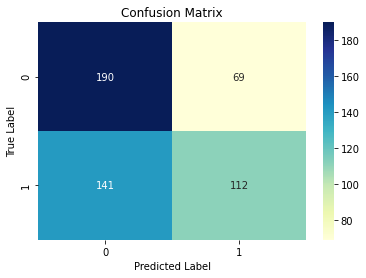


########### Now k is 85 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.603515625
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       259
           1       0.62      0.49      0.55       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.60       512
weighted avg       0.61      0.60      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6120352250489237
              precision    recall  f1-score   support

           0       0.59      0.71      0.65      1019
           1       0.64      0.52      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


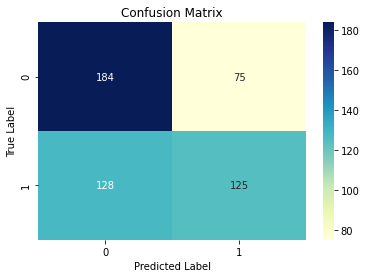


########### Now k is 86 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.6015625
              precision    recall  f1-score   support

           0       0.58      0.75      0.66       259
           1       0.64      0.45      0.53       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.59       512
weighted avg       0.61      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6066536203522505
              precision    recall  f1-score   support

           0       0.58      0.74      0.65      1019
           1       0.65      0.48      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.61      0.61      0.60      2044
weighted avg       0.61      0.61      0.60      2044

--------------------------------------------------------


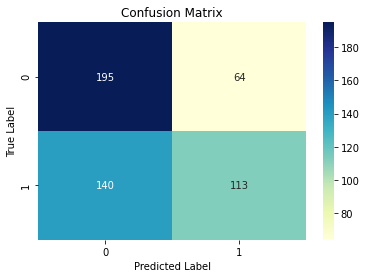


########### Now k is 87 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.599609375
              precision    recall  f1-score   support

           0       0.58      0.72      0.65       259
           1       0.62      0.47      0.54       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6086105675146771
              precision    recall  f1-score   support

           0       0.59      0.71      0.64      1019
           1       0.64      0.51      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.61      0.61      0.61      2044
weighted avg       0.61      0.61      0.60      2044

--------------------------------------------------------


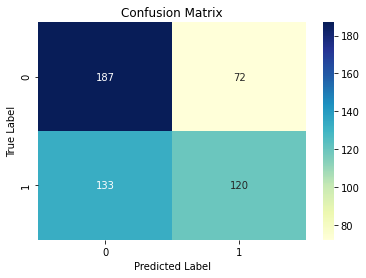


########### Now k is 88 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.58      0.76      0.66       259
           1       0.64      0.43      0.51       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.59       512
weighted avg       0.61      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6076320939334638
              precision    recall  f1-score   support

           0       0.58      0.74      0.65      1019
           1       0.65      0.48      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.60      2044
weighted avg       0.62      0.61      0.60      2044

--------------------------------------------------------


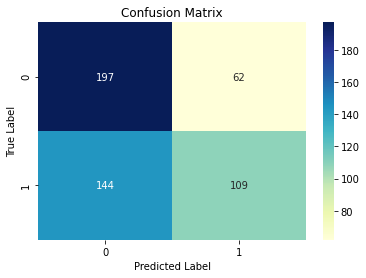


########### Now k is 89 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.58      0.73      0.65       259
           1       0.63      0.46      0.53       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6120352250489237
              precision    recall  f1-score   support

           0       0.59      0.72      0.65      1019
           1       0.64      0.51      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


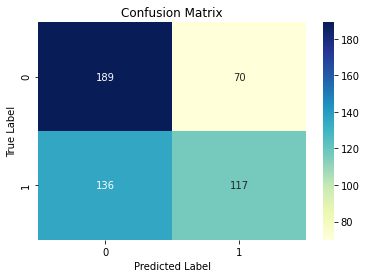


########### Now k is 90 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.591796875
              precision    recall  f1-score   support

           0       0.57      0.75      0.65       259
           1       0.63      0.43      0.51       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.58       512
weighted avg       0.60      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6135029354207436
              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1019
           1       0.66      0.48      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


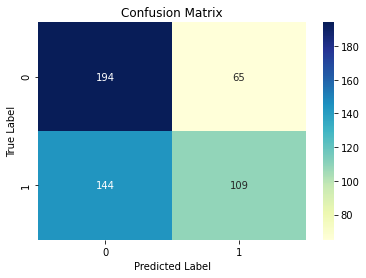


########### Now k is 91 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.603515625
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       259
           1       0.62      0.49      0.55       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.60       512
weighted avg       0.61      0.60      0.60       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6110567514677103
              precision    recall  f1-score   support

           0       0.59      0.71      0.65      1019
           1       0.64      0.51      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


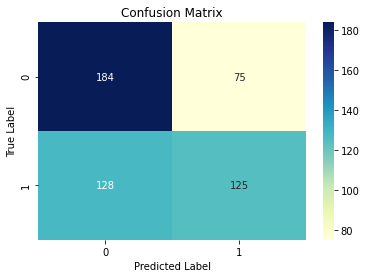


########### Now k is 92 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.591796875
              precision    recall  f1-score   support

           0       0.58      0.73      0.64       259
           1       0.62      0.45      0.52       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.58       512
weighted avg       0.60      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6105675146771037
              precision    recall  f1-score   support

           0       0.59      0.74      0.66      1019
           1       0.65      0.48      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.60      2044
weighted avg       0.62      0.61      0.60      2044

--------------------------------------------------------


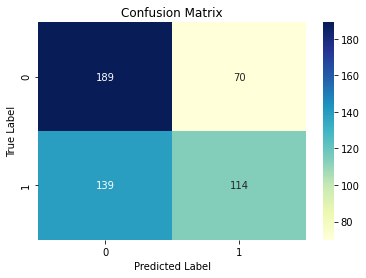


########### Now k is 93 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.587890625
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       259
           1       0.60      0.49      0.54       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.58       512
weighted avg       0.59      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6095890410958904
              precision    recall  f1-score   support

           0       0.59      0.71      0.64      1019
           1       0.64      0.51      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.61      0.61      0.61      2044
weighted avg       0.61      0.61      0.61      2044

--------------------------------------------------------


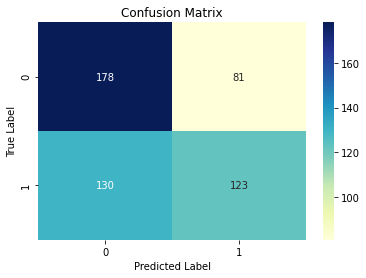


########### Now k is 94 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.587890625
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       259
           1       0.61      0.45      0.52       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.58       512
weighted avg       0.59      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6135029354207436
              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1019
           1       0.66      0.48      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


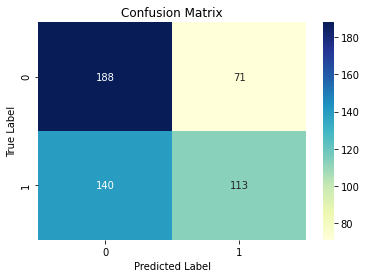


########### Now k is 95 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59375
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       259
           1       0.61      0.48      0.54       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.59      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6144814090019569
              precision    recall  f1-score   support

           0       0.59      0.73      0.65      1019
           1       0.65      0.50      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


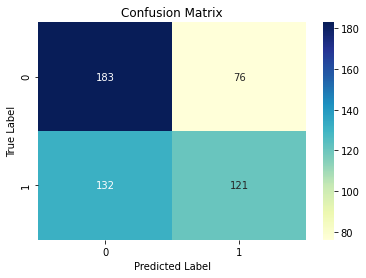


########### Now k is 96 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59375
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       259
           1       0.63      0.44      0.52       253

    accuracy                           0.59       512
   macro avg       0.60      0.59      0.58       512
weighted avg       0.60      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6120352250489237
              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1019
           1       0.66      0.47      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.60      2044
weighted avg       0.62      0.61      0.60      2044

--------------------------------------------------------


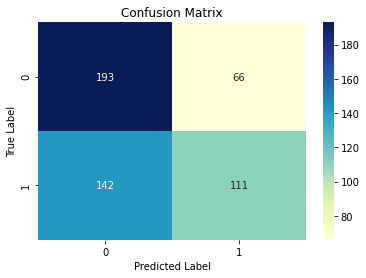


########### Now k is 97 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       259
           1       0.62      0.47      0.54       253

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.610078277886497
              precision    recall  f1-score   support

           0       0.59      0.71      0.65      1019
           1       0.64      0.51      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.61      2044
weighted avg       0.62      0.61      0.61      2044

--------------------------------------------------------


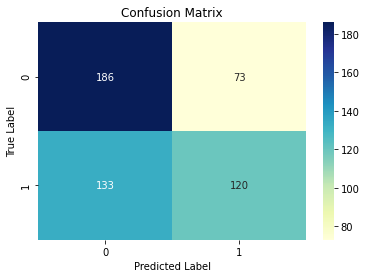


########### Now k is 98 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.59765625
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       259
           1       0.63      0.44      0.52       253

    accuracy                           0.60       512
   macro avg       0.61      0.60      0.59       512
weighted avg       0.61      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6081213307240705
              precision    recall  f1-score   support

           0       0.58      0.74      0.65      1019
           1       0.65      0.48      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.62      0.61      0.60      2044
weighted avg       0.62      0.61      0.60      2044

--------------------------------------------------------


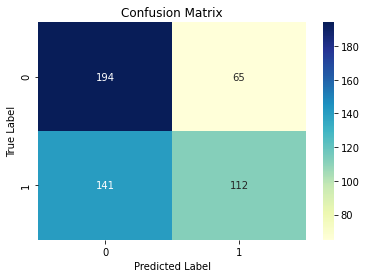


########### Now k is 99 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.587890625
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       259
           1       0.61      0.47      0.53       253

    accuracy                           0.59       512
   macro avg       0.59      0.59      0.58       512
weighted avg       0.59      0.59      0.58       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6081213307240705
              precision    recall  f1-score   support

           0       0.59      0.71      0.64      1019
           1       0.64      0.51      0.57      1025

    accuracy                           0.61      2044
   macro avg       0.61      0.61      0.60      2044
weighted avg       0.61      0.61      0.60      2044

--------------------------------------------------------


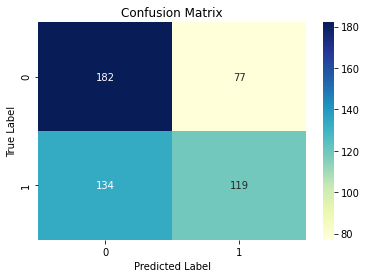


########### Now k is 100 ###############
----- Evaluation on Test Data -----
Accuracy Score:  0.595703125
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       259
           1       0.63      0.44      0.52       253

    accuracy                           0.60       512
   macro avg       0.60      0.59      0.59       512
weighted avg       0.60      0.60      0.59       512

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6061643835616438
              precision    recall  f1-score   support

           0       0.58      0.74      0.65      1019
           1       0.65      0.47      0.55      1025

    accuracy                           0.61      2044
   macro avg       0.61      0.61      0.60      2044
weighted avg       0.61      0.61      0.60      2044

--------------------------------------------------------


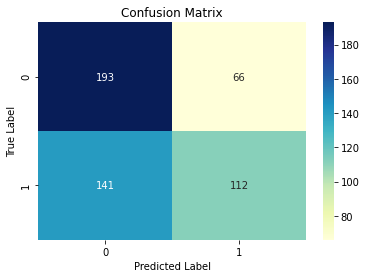

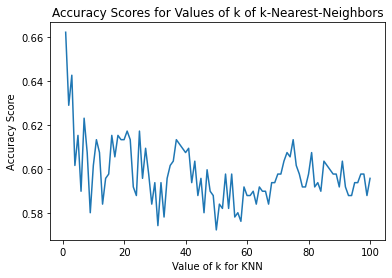

In [238]:
acc_list = []
from tqdm.notebook import tqdm

k_range = range(1,101)
for i in tqdm(k_range):
  print("########### Now k is " + str(i) + " ###############")
  acc = fitting(X, Y, i)
  acc_list.append(acc)
  print("")

plt.plot(list(k_range), acc_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()